In [95]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

%matplotlib inline


In [96]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#BA4D49']),#,'#4D6168','#F06560','#83A8AE','#E6B0A4','#C9CFAD']),
    'axes.spines.left'   : True,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
    'axes.labelcolor'  :'#4D6168',
    'axes.grid'           : True,
    'axes.axisbelow'      : True,
    
    'font.sans-serif': 'Arial Rounded MT Bold',
    'font.family': 'sans-serif',
    
    'text.color': '#4D6168',
    
    'xtick.color' : '#4D6168',
    'ytick.color' : '#4D6168',
    
    'grid.color':  '#83A8AE',
    
    'legend.edgecolor': 'white',
 
})

In [80]:
fb = open("nyhtokauratutka_fb.txt").read()



In [81]:
fb

'regex päivämääriä varten\n\\w*\\s\\d*\\d,\\s201\\d\nFacebook\n\n\n\nNyhtökauratutka\n\nPäivi\nHome\nFriend Requests\nMessages\n1\nNotifications\nAccount Settings\nNyhtökauratutka\nPublic Group\nAbout\nDiscussion\nMembers\nEvents\nVideos\nPhotos\n\nSearch this group\nSearch this group\nShortcuts\n\nColumbia Journalism School Class of 2019\n1\n\nSuomalaiset lapsiperheet New Yorkissa\n1\n\nThe Eat Your Books Cookbook Club\n13\n\n#CJSGlobal\n4\n\nThe Cookbook Junkies\n20+\n\nUpper West Side Parents\n20+\n\nKestovaipat ja kantovälineet kiertoon, (O)sta -(M)yy - (V)aihda\n20+\n\nHS-journalismi aina!\n2\n\nAmerikansuomalaisten Markkinapaikka\n16\n\nMutsit Vs Faijat\n20+\n\nKansainvälinen ruokapirtti\n20+\n\nSwansean Suomalaiset\n\nKallio kierrättää lastenvaatteet ja -tarvikkeet\n20+\nSee more\n\n\nJoined\nNotifications\nShare\nsettingsMore\nADD MEMBERS\n\nEnter name or email address...\nnote\n1,787 Members\nMEMBERS\n\n\n\n\n\n\nSUGGESTED MEMBERS\nHide\nSUGGESTED MEMBERS\nFriends\n\nAdd Membe

In [82]:
#fb = fb.split('\n')

In [83]:
#fb

In [84]:
type(fb)

str

In [85]:
dates = re.findall(r"\w*\s\d*\d,\s201\d", fb)
dates

['July 19, 2016',
 'November 5, 2017',
 'October 9, 2017',
 'October 9, 2017',
 'October 5, 2017',
 'September 23, 2017',
 'September 11, 2017',
 'September 1, 2017',
 'July 14, 2017',
 'June 25, 2017',
 'May 18, 2017',
 'April 28, 2017',
 'May 6, 2017',
 'May 5, 2017',
 'May 4, 2017',
 'April 29, 2017',
 'April 29, 2017',
 'April 28, 2017',
 'April 27, 2017',
 'April 25, 2017',
 'April 25, 2017',
 'April 23, 2017',
 'April 18, 2017',
 'April 17, 2017',
 'April 13, 2017',
 'April 12, 2017',
 'April 12, 2017',
 'April 12, 2017',
 'April 11, 2017',
 'April 10, 2017',
 'April 10, 2017',
 'April 10, 2017',
 'April 8, 2017',
 'April 8, 2017',
 'April 8, 2017',
 'April 7, 2017',
 'April 7, 2017',
 'April 7, 2017',
 'April 2, 2017',
 'April 1, 2017',
 'March 31, 2017',
 'March 31, 2017',
 'March 30, 2017',
 'March 29, 2017',
 'March 28, 2017',
 'March 27, 2017',
 'March 27, 2017',
 'March 27, 2017',
 'March 27, 2017',
 'March 25, 2017',
 'March 26, 2017',
 'March 24, 2017',
 'March 25, 2017',

In [86]:
df = pd.DataFrame(dates, columns=['dates'])
df.head()

,dates
0,"July 19, 2016"
1,"November 5, 2017"
2,"October 9, 2017"
3,"October 9, 2017"
4,"October 5, 2017"


In [87]:
df['dates'] = pd.to_datetime(df['dates'], format="%B %d, %Y")
df.head()

,dates
0,2016-07-19
1,2017-11-05
2,2017-10-09
3,2017-10-09
4,2017-10-05


In [89]:
df.resample('M', on="dates").count()

,dates
dates,
2016-07-31,77
2016-08-31,110
2016-09-30,90
2016-10-31,68
2016-11-30,77
2016-12-31,63
2017-01-31,23
2017-02-28,29
2017-03-31,48


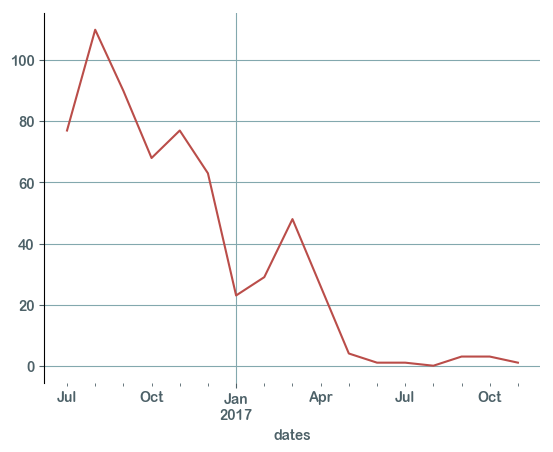

In [97]:
df.resample('M', on="dates").count().dates.plot()

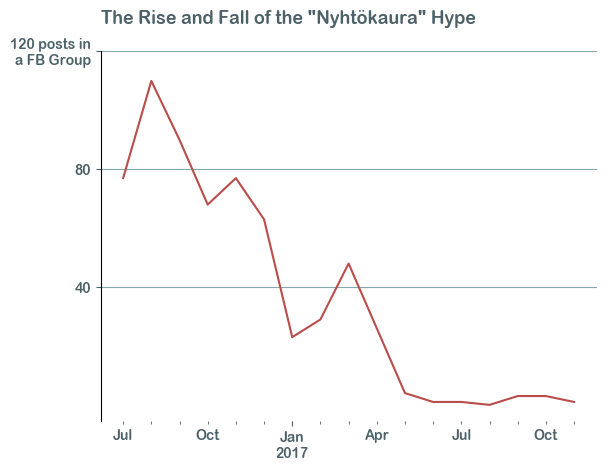

In [116]:
ax_all_sw=df.resample('M', on="dates").count().dates.plot()

ax_all_sw.set_title('The Rise and Fall of the "Nyhtökaura" Hype', pad=20, fontsize=13, loc='left')
#plt.gcf().text(0.12, 0.98, "Number of people killed by foodborne outbreaks from 1998 to 2016", ha='left', fontsize=12)
#ax_all_sw.yaxis.label.set_visible(False)
ax_all_sw.xaxis.label.set_visible(False)
ax_all_sw.grid(False, axis='x')
#ax_all_sw.tick_params(labeltop=True, labelbottom=False)
#ax_all_sw.tick_params(left=True)
#ax_all_sw.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])
#ax_all_sw.set_xticklabels(["10", '20','30','40','50'])
ax_all_sw.set_yticks([40,80,120])
ax_all_sw.set_yticklabels(["40","80","120 posts in\na FB Group"])
#ax_all_sw.legend_.remove()
#ax_all_sw.tick_params(left=False, bottom=False)
plt.savefig("all_sidewalk.pdf", transparent=True)
